# Systemy uczące się: Modele generatywne i dyskryminatywne

## Zadanie 1
Zadanie polega na implementacji klasyfikatora naiwnego Bayesa dla zmiennych ciągłych gdzie za rozkłady cechy przyjmij rozkłady normalne.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use("ggplot")

Do testowania twojego rozwiązania użyj trzech generatorów danych sztucznych `generate1`, `generate2` oraz `generate3` (funkcje te przyjmują jako argument liczbę elementów do wygenerowania z każdej klasy - domyślnie $N=100$). Sposób ich wywołania jest przedstawiony poniżej:

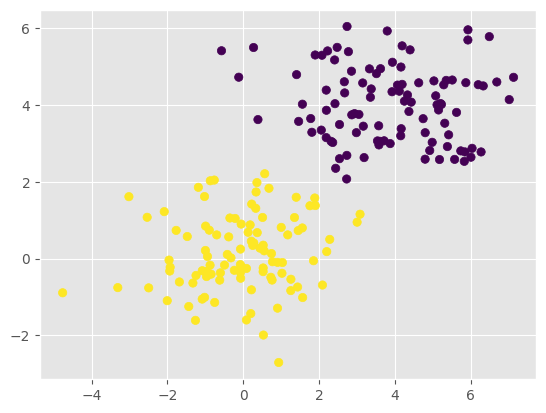

In [2]:
from helpers import generate1, generate2, generate3

X, y = generate1()
plt.scatter(X[:,0], X[:,1], c = y)

W implementacji będzie przydatna klasa `norm` z pakietu `scipy`, która zwraca wartości funkcji gęstości prawdopodobieństwa rozkładu normalnego dla zmiennych ciągłych.

In [3]:
from  scipy.stats import norm

# (X, mean, std)
norm.pdf(5, 0, 1) #gęstość prawd. dla 5 z rozkładu standardowego
norm.logpdf(5, 0, 1) #logarytm gęstości prawd. dla 5 z rozkładu standardowego

-13.418938533204672

Zaimplementuj klasyfikator naiwnego Bayesa dla zmiennych ciągłych. Pamiętaj o zabezpieczniu się przed problemem wynikającym z mnożenia wielu małych liczb (prawdopodobieństw).

In [19]:

class GaussianNaiveBayes():
    def __init__(self):
        self.means = {} 
        # Słownik, który docelowo powinien zawierać tablicę/wektor warunkowych średnich dla każdego atrybutu 
        # Każda tablica/wektor powinna być typu np.array
        # np. 1) means[1] powinno zawierać wektor średnich wartości atrybutów  dla klasy o indeksie 1
        #     2) means[0][1] powinno zawierać średnią 1 atrybutu dla klasy o indeksie 0
        # (Możesz spróbować zaimplementować efektywniejszą implementację używając macierzy)
        self.stds = {} 
        # Analogiczna struktura dla odchyleń standardowych
        self.class_log_prob = None 
        # Wektor zawierający logarytmy prawdopodobieństwa dla każdej z klas 
        # np. class_log_prob[1] zawiera logarytm prawdopodobieństwa, że klasa jest równa 1 P(C=1)
        
    def fit(self, X, y):
        self.classes = range(len(set(y)))
        self.means = [np.mean(X[y == cls,:], axis=0) for cls in self.classes]
        self.stds = [np.std(X[y == cls,:], axis=0) for cls in self.classes]
        self.class_log_prob = np.log([np.mean(y == cls) for cls in self.classes])
        # X jest macierzą gdzie każdy wiersz zawiera kolejną obserwację (typ np.array) 
        # y jest wektorem wartości indeksu klasy (0 lub 1). Jego wartości odpowiadają kolejnym wierszom X
        
    def predict_proba(self, X):
        # Funkcja powinna zwrócić macierz o dwóch kolumnach (dwie klasy) w której kolejne wiersze 
        # zawierają prawdopodobieństwa P(c|x) przynależności dla klas dla kolejnych obserwacji w macierzy X
        return np.exp([[sum(norm.logpdf(X[i][j],self.means[k][j],self.stds[k][j]) for j in range(X.shape[1])) + self.class_log_prob[k] for k in self.classes] for i in range(X.shape[0])])
    
    def predict(self, X):
        # Gotowa funkcja wybierająca klasę z największym prawdopodobieństwem
        prob = self.predict_proba(X)
        return np.argmax(prob, axis=1)


Przetestuj twój klasyfikator na wygenerowanych wcześniej danych.

In [20]:
gnb = GaussianNaiveBayes()
gnb.fit(X,y)
#Trafność na zbiorze uczącym
np.mean(gnb.predict(X) == y)


1.0

Narysowanie nauczonego klasyfikatora

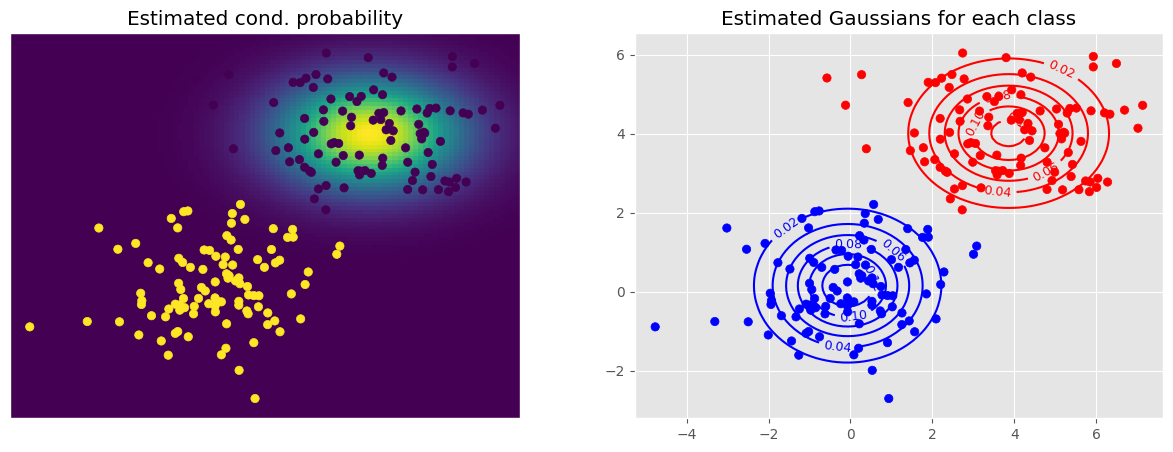

In [21]:
from helpers import plotGaussianBayes
plotGaussianBayes(X, y, gnb)

Użyj funkcji do generowania danych, aby wygenerować zbiór testowy oraz sprawdź na nim trafność klasyfikacji metody.

In [7]:
X_test, y_test = generate1(1000)
np.mean(gnb.predict(X_test) == y_test)

0.992

In [8]:
# Tu będą testy sprawdzarki

**Ćwiczenia**
 - Pamiętaj o przetestowaniu Twojego algorytmu dla wszystkich trzech generatorów danych. W których ze zbiorów założenie o warunkowej niezależności zmiennych jest spełnione? Jak brak spełnienia tego założenia wpływa na działanie klasyfikatora?
 - Z pliku `helpers` zaimportuj klasę `GaussianBayes` (identyczna obsługa jak tej zaimplementowanej przez Ciebie). Klasa implementuje algorytm Bayesa bez założenia o niezależności zmiennych (ale z założeniem o normalności rozkładów). Porównaj wyniki - szczególnie dla zbiorów dla których założenie o warunkowej niezależności zmiennych nie jest spełnione.
 - Klasyfikatora `GaussianBayes` nie można wytrenować na zbiorach które mają mniej niż 3 przykłady dla każdej z klas. Jak myślisz dlaczego? Jak ten problem będzie się zmieniał dla zbiorów o wysokiej liczbie cech?
 - Nawet używając klasyfikatora `GaussianBayes`, który zakłada kompletny model zależności i prawidłowy rozkład danych (nasze dane są generowane z rozkładów normalnych) - często nie jest w stanie uzyskać 100% trafności nawet na zbiorze uczącym. Jak myślisz, dlaczego? 
 - Czy gdyby przepisać do klasyfikatora prawdziwe wartości średnich i macierz wariancji-kowariancji cech (z generatora) - uzyskalibyśmy 100% trafność? Co możemy powiedzieć o takim klasyfikatorze? Czy jest możliwe uzyskanie klasyfikatora bardziej trafnego niż taki? 
 
 Odpowiedzi na dwa ostatnie pytania zostaną sprawdzone: wpisz swoje odpowiedzi poniżej.

4. Klasyfikator Bayesowski może nie uzyskać  100% trafności, ponieważ nawet 99% prawdopodobieństwo przynależności do klas może być mylne.
5. Nie uzyskamy 100% trafności. Klasyfikator ze 100% trafnością to klasyfikator doskonały.

# Zadanie 2
Klasyfikator naiwnego Bayesa często jest używany do klasyfikacji tekstów. Przetestuj działanie algorytmów na podanym rzeczywistym zbiorze danych: 
> The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). The split between the train and test set is based upon a messages posted before and after a specific date.

Podany zbiór jest wieloklasowy, więc poniższy kod wybiera z niego podzbiór postów tylko z dwóch tematów.

In [9]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

categories = [  'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories)

vectorizer = TfidfVectorizer(binary=True, use_idf=False, norm=None) # Przekształcenie tekstu na cechy binarne
vectors = vectorizer.fit_transform(newsgroups_train.data)
vectors_test = vectorizer.transform(newsgroups_test.data)
vectors = vectors.toarray()
vectors_test = vectors_test.toarray()

Dokumenty w zbiorze można wyświetlić w następujący sposób.

In [10]:
newsgroups_train.data[0:3]

['From: ab@nova.cc.purdue.edu (Allen B)\nSubject: Re: thining algorithm\nOrganization: Purdue University\nLines: 15\n\nIn article <1q7615INNmi@shelley.u.washington.edu> kshin@stein.u.washington.edu  \n(Kevin Shin) writes:\n> I am trying obtain program to preprocess handwriting characters.\n> Like thining algorithm, graph alogrithm.\n> Do anyone know where I can obtain those?\n\nI usually use "Algorithms for graphics and image processing" by\nTheodosios Pavlidis, but other people here got them same idea and now\n3 of 4 copies in the libraries have been stolen!\n\nAnother reference is "Digital Image Processing" by Gonzalez and\nWintz/Wood, which is widely available but a little expensive ($55\nhere- I just checked today).\n\nab\n',
 "From: stephens@geod.emr.ca (Dave Stephenson)\nSubject: Re: Clementine Science Team Selected\nNntp-Posting-Host: ngis.geod.emr.ca\nOrganization: Dept. of Energy, Mines, and Resources, Ottawa\nLines: 32\n\nnickh@CS.CMU.EDU (Nick Haines) writes:\n\n>In article 

Analogicznie możemy uzyskać dostęp do informacji o klasach.

In [11]:
newsgroups_train.target[0:3]

array([0, 1, 0], dtype=int64)

i do "zbinaryzowanego" tekstu

In [12]:
vectors[0:3]
vectors.shape


(1177, 23882)

Wytrenuj klasyfikator Naiwnego Bayesa z rozmywaniem estymat (patrz pakiet `sklearn`) i sprawdż jego trafność na zbiorze uczącym i testowym.
UWAGA: wytrenowany klasyfikator powinien być przypisany do zmiennej `nb` na której `nb.predict()` zostaną wykonane testy

In [13]:
# YOUR CODE HERE
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(vectors, newsgroups_train.target)
nb.predict(vectors_test)
train_acc = nb.score(vectors, newsgroups_train.target)
test_acc = nb.score(vectors_test, newsgroups_test.target)
print(f"Trafnosc na zbiorze uczacym: {train_acc}")
print(f"Trafnosc na zbiorze testowym: {test_acc}")

Trafnosc na zbiorze uczacym: 1.0
Trafnosc na zbiorze testowym: 0.9233716475095786


In [14]:
# Tu będą testy

**Ćwiczenia**
 - Dlaczego klasyfikator Naiwnego Bayesa dość dobrze sprawdza się do powyższego zadania i analogicznych?
 - Przeanalizuj wartości estymat prawdopodobieństw. Które cechy/słowa są najlepszymi wskaźnikami dla podanych klas? Jakie słowa bardzo słabo wskazują na którąkolwiek z klas?
 - Czy byłoby możliwe wytrenowanie równie skutecznego klasyfikatora z mniejszą liczbą cech? W jaki sposób można by to uzyskać?
 - Analizowany zbiór jest oryginalnie wieloklasowy z tego powodu możemy go wykorzystać do wielu testów wybierając różne pary klas. Pełna lista tematów: 'alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc'
 - Czy są pary tematów dla których ten klasyfikator działa znacząco gorzej?
 - Jakie są zalety stosowania klasyfikatora Bayesa dla tego problemu (i w ogólności)? Czy do tego problemu sprawdziłyby się reguły lub drzewa decyzyjne? Dlaczego?
 
 Odpowiedzi na kropki 1, 3 i 6 wpisz poniżej - zostaną sprawdzone.

1. Ponieważ wystąpienie danego słowa z pewnym prawdopodobieństwem może oznaczać daną klasę.
3. Tak, mniejszą liczbą cech uzyskamy po zmniejszeniu zbioru testowego.
6. Tak do tego problemu sprawdziłby się drzewa decyzyjne, ponieważ są dobrym klasyfikatorem opierającym się losowych zbiorze cech.